# Assignment 5, Question 7: Group Operations & Final Analysis

**Points: 15**

Perform grouped analysis and create summary reports.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities
from q3_data_utils import load_data, summarize_by_group

df = load_data('data/clinical_trial_raw.csv')
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for grouped analysis
def plot_group_comparison(data, x_col, y_col, title):
    """
    Create a bar chart comparing groups.
    
    Args:
        data: DataFrame with grouped data
        x_col: Column name for x-axis (groups)
        y_col: Column name for y-axis (values)
        title: Chart title
    """
    plt.figure(figsize=(10, 6))
    data.plot(x=x_col, y=y_col, kind='bar')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Loaded 10000 patients


## Part 1: Basic Groupby (5 points)

1. Group by 'site' and calculate mean age, BMI, and blood pressure
2. Group by 'intervention_group' and count patients
3. Use the `summarize_by_group()` utility to get overall statistics by site

In [2]:
# TODO: Group by site
# clean sex column
df_clean = df.copy()
df_clean['sex'] = df_clean['sex'].str.strip().str.lower().replace({
    'f': 'female',
    'm': 'male'
})

# clean intervention_group 
df_clean['intervention_group'] = df_clean['intervention_group'].str.strip().str.lower().replace({
    'treatmen a': 'treatment a',
    'treatmenta': 'treatment a',
    'treatment  b': 'treatment b',
    'contrl': 'control'
})

# clean site 
df_clean['site'] = df_clean['site'].str.strip().str.lower().replace({
    'site  a': 'site a',
    'site_d': 'site d',
    'site d': 'site d',
    'site a': 'site a'
})

# clean outcome_cvd & dropout 
df_clean[['outcome_cvd', 'dropout']] = df_clean[['outcome_cvd', 'dropout']].apply(
    lambda col: col.str.strip().str.lower().replace(['na', 'n/a', 'none', 'null', ''], np.nan)
)


site_analysis = df_clean.groupby('site')[['age', 'bmi', 'systolic_bp']].mean().reset_index()

site_analysis.head()

,site,age,bmi,systolic_bp
0,site a,56.364005,25.875183,117.354284
1,site b,62.401957,25.706681,117.130675
2,site c,57.312108,25.789583,117.978359
3,site d,63.491006,25.565682,117.943662
4,site e,57.064897,25.476502,117.503080


In [3]:
# TODO: Count by intervention group
intervention_counts = df_clean.groupby(
    "intervention_group")["patient_id"].count().reset_index(name="patient_count")
display(intervention_counts)

,intervention_group,patient_count
0,control,3337
1,treatment a,3321
2,treatment b,3342


**Note:** The `summarize_by_group()` function has an optional `agg_dict` parameter for custom aggregations. If you don't specify it, it will use `.describe()` on numeric columns. You can use `agg_dict={'age': ['mean', 'std'], 'bmi': 'mean'}` for custom aggregations.


In [4]:
# TODO: Use summarize_by_group utility
site_analysis = summarize_by_group(df_clean, group_col="site")
display(site_analysis)

age                                                            bmi  \
         count       mean         std    min   25%   50%   75%    max   count   
site                                                                            
site a  2956.0  56.364005  162.536292 -999.0  70.0  81.0  93.0  100.0  2873.0   
site b  2453.0  62.401957  139.050180 -999.0  69.0  80.0  92.0  100.0  2350.0   
site c  2073.0  57.312108  157.941868 -999.0  70.0  80.0  91.0  100.0  1968.0   
site d  1501.0  63.491006  136.140058 -999.0  70.0  80.0  92.0  100.0  1422.0   
site e  1017.0  57.064897  157.697644 -999.0  69.0  80.0  92.0  100.0   949.0   

                   ... adverse_events      adherence_pct             \
             mean  ...            75%  max         count       mean   
site               ...                                                
site a  25.875183  ...            0.0  3.0        2527.0  61.610605   
site b  25.706681  ...            0.0  4.0        2078.0  60.876323   
site c  25.789583  ...            0.0  3.0        1788.0  60.923937   
site d  25.565682  ...            0.0  2.0        1272.0  59.672170   
site e  25.476502  ...            0.0  3.0         868.0  57.842166   

                                                   
              std   min   25%   50%    75%    max  
site                                               
site a  19.049264  20.0  48.0  63.0  75.00  100.0  
site b  18.950906  20.0  47.0  62.0  75.00  100.0  
site c  18.256790  20.0  49.0  62.0  74.00  100.0  
site d  19.143261  20.0  46.0  61.0  74.25  100.0  
site e  19.720813  20.0  44.0  57.0  72.00  100.0  

[5 rows x 88 columns]

## Part 2: Multiple Aggregations (5 points)

Group by 'site' and apply multiple aggregations:
- age: mean, std, min, max
- bmi: mean, std
- systolic_bp: mean, median

Display the results in a well-formatted table.

In [5]:
# TODO: Multiple aggregations
site_statistics = df_clean.groupby("site").agg({
    'age': ['mean', 'std', 'min', 'max'],
    'bmi': ['mean', 'std'],
    'systolic_bp': ['mean', 'median']
}).reset_index()

display(site_statistics)

site        age                              bmi           systolic_bp  \
                mean         std  min  max       mean       std        mean   
0  site a  56.364005  162.536292 -999  100  25.875183  4.983102  117.354284   
1  site b  62.401957  139.050180 -999  100  25.706681  5.017423  117.130675   
2  site c  57.312108  157.941868 -999  100  25.789583  5.417217  117.978359   
3  site d  63.491006  136.140058 -999  100  25.565682  5.881319  117.943662   
4  site e  57.064897  157.697644 -999  100  25.476502  6.084532  117.503080   

          
  median  
0  117.0  
1  117.0  
2  118.0  
3  118.0  
4  117.0

## Part 3: Comparative Analysis (5 points)

Compare intervention groups:
1. Calculate mean outcome_cvd rate by intervention_group
2. Calculate mean adherence_pct by intervention_group
3. Create a cross-tabulation of intervention_group vs dropout status
4. Visualize the comparison with a bar plot

,intervention_group,mean_outcome_cvd
0,control,0.336530
1,treatment a,0.319482
2,treatment b,0.333633


,intervention_group,mean_adherence_pct
0,control,60.621688
1,treatment a,60.210173
2,treatment b,61.009404


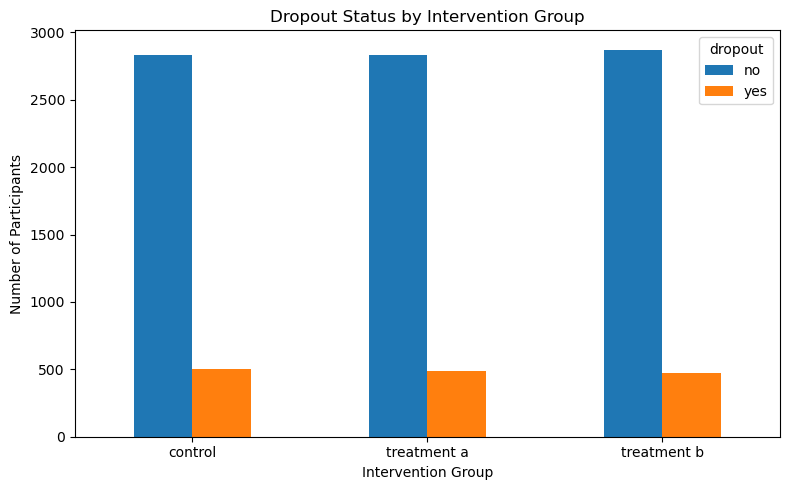

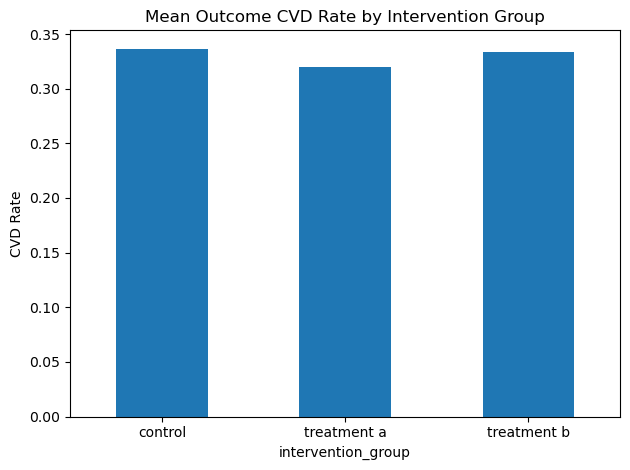

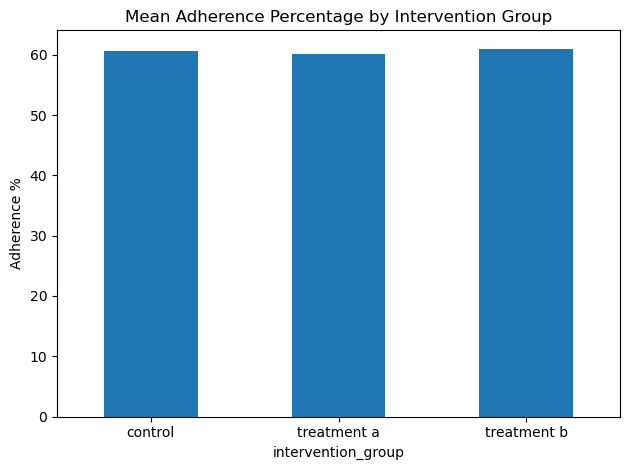

In [6]:
# TODO: Intervention group comparisons
df_clean['outcome_cvd'] = df_clean['outcome_cvd'].map({'yes': 1, 'no': 0})
cvd_rate = df_clean.groupby('intervention_group')['outcome_cvd'].mean().reset_index(name='mean_outcome_cvd')
display(cvd_rate)
adherence_summary = df_clean.groupby('intervention_group')['adherence_pct'].mean().reset_index(name='mean_adherence_pct')
display(adherence_summary)
comparison_df = cvd_rate.merge(adherence_summary, on = "intervention_group")

# table for visualizations
table = pd.crosstab(df_clean["intervention_group"], df_clean["dropout"])

# plot all
table.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title('Dropout Status by Intervention Group')
plt.xlabel('Intervention Group')
plt.ylabel('Number of Participants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

cvd_rate.plot.bar(x='intervention_group', y='mean_outcome_cvd', legend=False)
plt.title('Mean Outcome CVD Rate by Intervention Group')
plt.ylabel('CVD Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

adherence_summary.plot.bar(x='intervention_group', y='mean_adherence_pct', legend=False)
plt.title('Mean Adherence Percentage by Intervention Group')
plt.ylabel('Adherence %')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



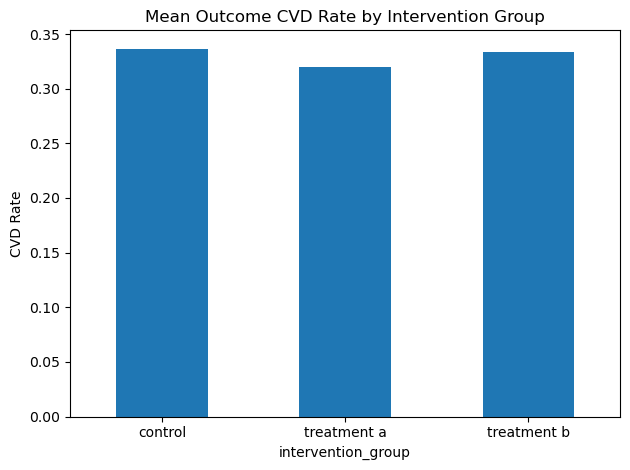

In [7]:
# TODO: Visualization

cvd_rate.plot.bar(x='intervention_group', y='mean_outcome_cvd', legend=False)
plt.title('Mean Outcome CVD Rate by Intervention Group')
plt.ylabel('CVD Rate')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


## Part 4: Final Report

Create and save:
1. Summary statistics by site → `output/q7_site_summary.csv`
2. Intervention group comparison → `output/q7_intervention_comparison.csv`
3. Text report with key findings → `output/q7_analysis_report.txt`

In [8]:
# TODO: Save summary outputs

# summary stats by site
site_analysis.to_csv("output/q7_site_summary.csv", index=False)


# intervention group comparison
site_statistics.to_csv("output/q7_intervention_comparison.csv")

# report with key findings
key_findings = [

    "1. There were different CVD rates between groups. Group A had 0.319 which was lower than the control and Treatment B. Treatment A is most effective for reducing cardiovascular risk.",
    "2. Treatment B had the highest adherence %, they followed the program the best, but did not have the lowest rate of cvd. Therefore the treatment was more effective than following the plan longer.",
    "3. The control group had the worst cvd outcomes, meaning the treatment itself had an effect, not just following the plan"

]

with open("output/q7_analysis_report.txt", "w") as f:
    f.write("\n".join(key_findings))

## Summary

What are the 3 most important findings from your analysis?

**Key Findings:**

1. There were different CVD rates between groups. Group A had 0.319 which was lower than the control and Treatment B. Treatment A is most effective for reducing cardiovascular risk.
2. Treatment B had the highest adherence %, they followed the program the best, but did not have the lowest rate of cvd. Therefore the treatment was more effective than following the plan longer.
3. The control group had the worst cvd outcomes, meaning the treatment itself had an effect, not just following the plan
